# explore FMN2

In [70]:
from logging_ import Logger
import matplotlib.pyplot as plt
import pandas as pd

%load_ext autoreload
%autoreload 2

from scores import SCORES
from settings import OPTIMAL_HYPERS_BEST, OPTIMAL_HYPERS_NORM


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [71]:
logger = Logger(logs_dir="logs_fmn5track2")

In [72]:
logger.load_all()
logger.logs_dir="logs_art_add_fmn_to_aa"
logger.load_all()
logger.logs_dir="logs_targeted"
logger.load_all()


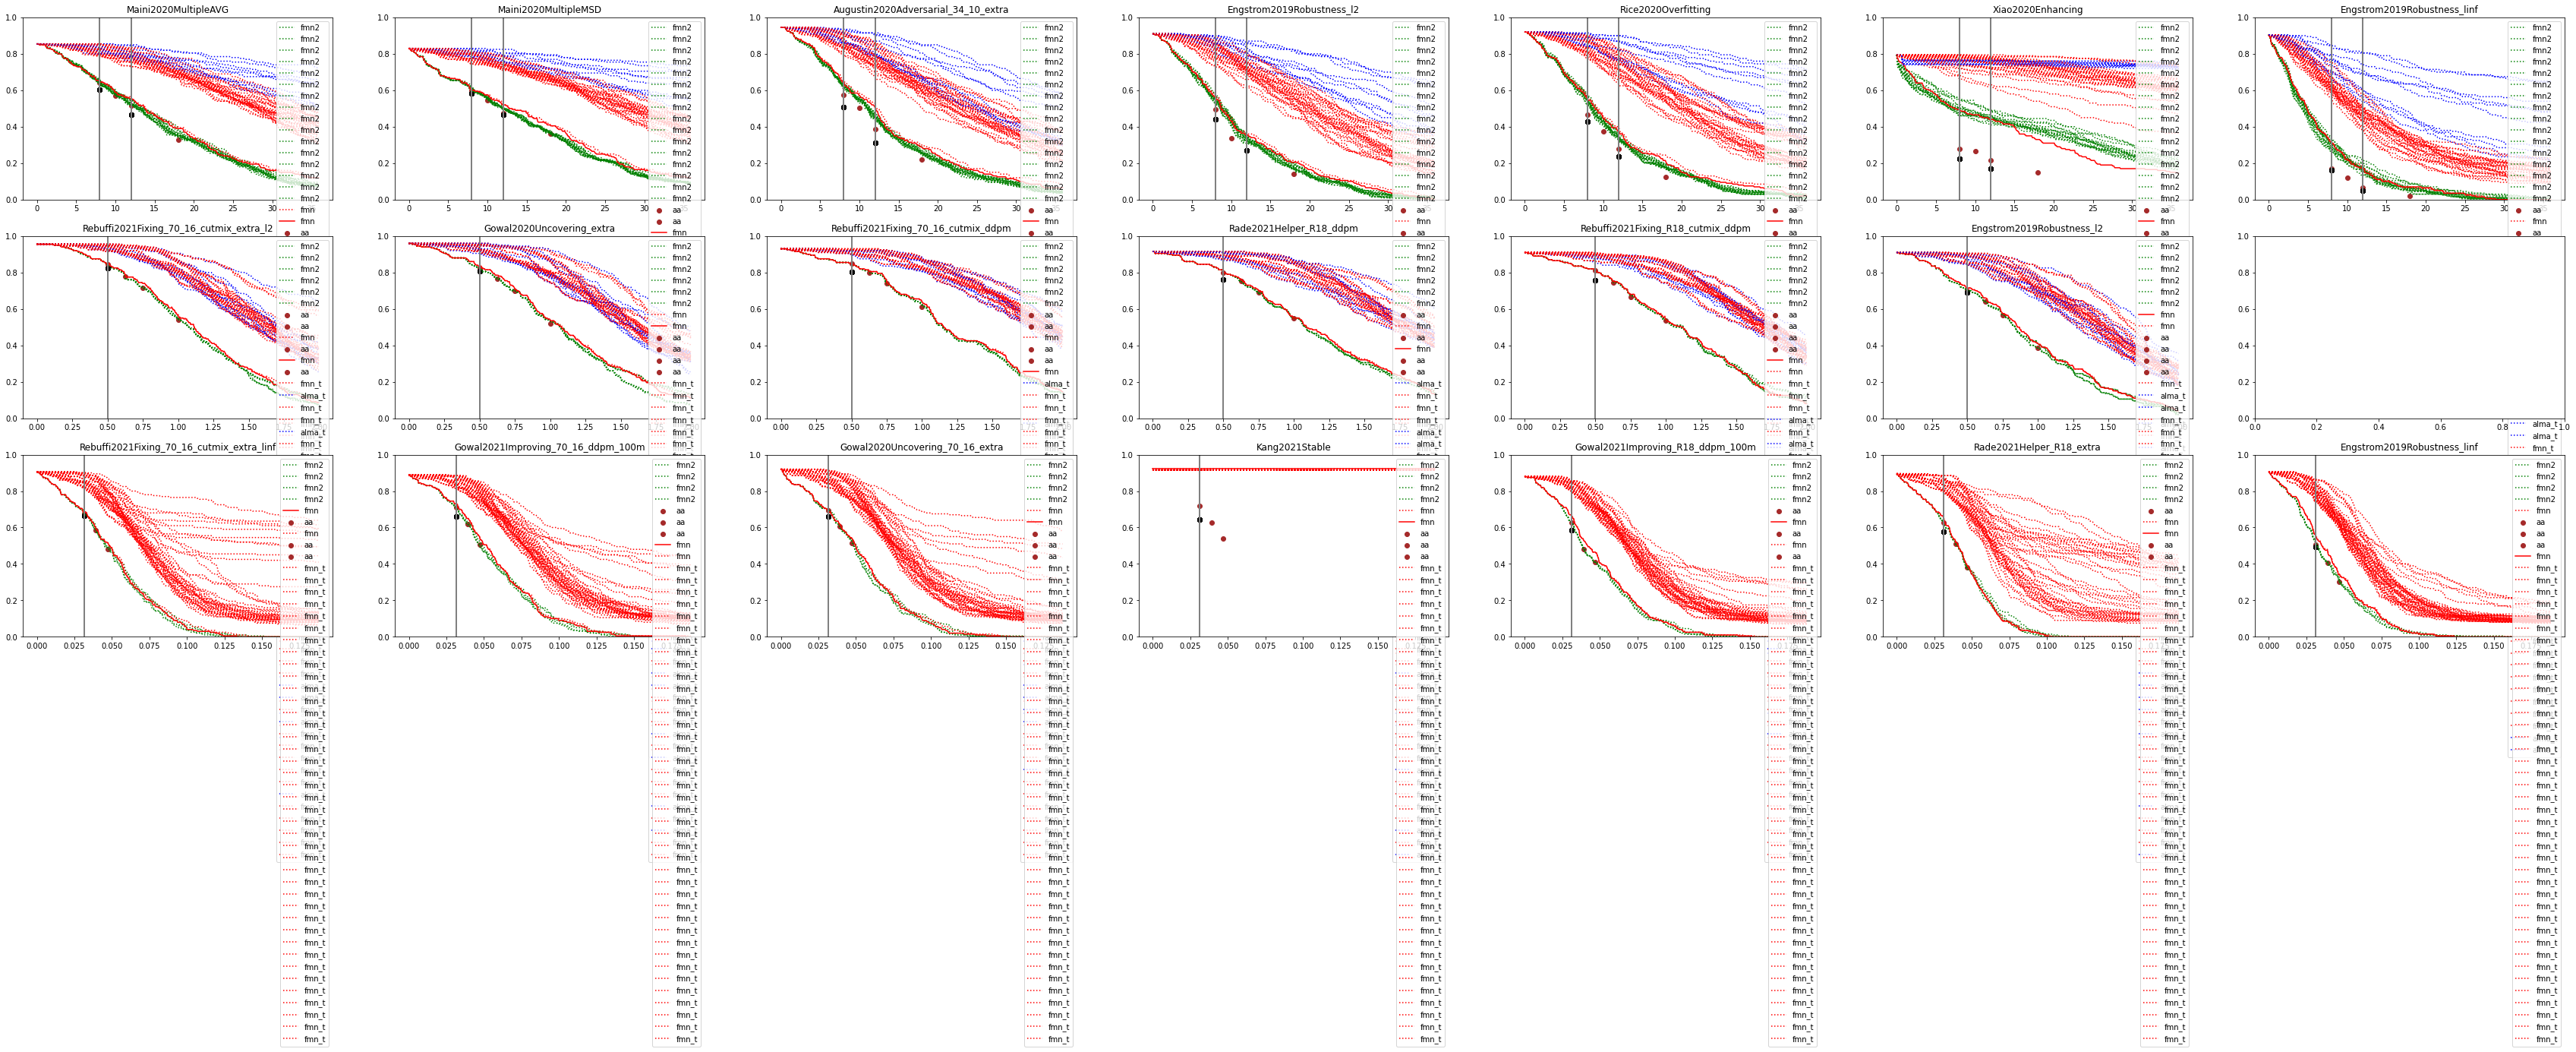

In [73]:
logger.plot_SE_grid(where_settings={"top_explore": "10"}, figsize=(60,15))

In [ ]:
logger.plot_QD_grid(where_settings={"top_explore": "10", "α_init":"5"}, figsize=(60,15))

In [ ]:
logger.plot_SE_grid(where_settings={"top_explore": "10"}, figsize=(60,15), compare_on="fmn_init")

In [ ]:
logger.plot_SE_grid(where_settings={"norm": "L1", "α_init":OPTIMAL_HYPERS_NORM["L1"]["α_init"], "top_explore": "10", "fmn_init": "True", "targeted_line": "False"}, figsize=(60,15), compare_on="balanced_init")

In [ ]:
logger.plot_SE_grid(where_settings={"norm": "L2", "top_explore": "10", "fmn_init": "True", "targeted_line": "False"}, figsize=(60,15), compare_on="balanced_init")

In [ ]:
logger.plot_SE_grid(where_settings={"norm": "Linf", "top_explore": "10", "fmn_init": "True", "targeted_line": "False"}, figsize=(60,15), compare_on="balanced_init")

In [ ]:
logger.plot_SE_grid(where_settings={"top_explore": "10"}, figsize=(60,15), compare_on="targeted_line")

In [ ]:
logger.plot_SE_grid(where_settings={"attack": "fmn2", "top_explore": "10", "fmn_init": "True", "targeted_line":"False"}, figsize=(60,15), compare_on="α_init")

In [ ]:
logger.plot_SE_grid(where_settings={"attack": "fmn2", "top_explore": "10", "targeted_line": "False"}, figsize=(60,15), compare_on="balanced_init")

In [74]:
from scores import SCORES
from settings import OPTIMAL_HYPERS_BEST, OPTIMAL_HYPERS_NORM
# DECIDE WHETHER TO add "all" versions wrt individual samples or not


# for norm in OPTIMAL_HYPERS_NORM:
#         for model in SCORES[norm][0]:
#             logger.merge(f"dataset-CIFAR10-norm-{norm}-attack-auto_all-model-{model}", [*logger.where(norm=norm, attack="aa", model=model).keys()])
OPTIMAL_HYPERS=OPTIMAL_HYPERS_NORM
for norm in OPTIMAL_HYPERS:
    for model in SCORES[norm][0]:
        for attack in ["fmn_t", "alma_t"]:
            run_ids = [*list(logger.where(model=model, attack=attack, **OPTIMAL_HYPERS[norm]).keys())]
            is_slow = lambda x: logger.get_n_steps(x) > 999
            quick_ids = [*filter(lambda x: not is_slow(x), run_ids)]
            slow_ids = [*filter(is_slow, run_ids)]
            if slow_ids:
                logger.merge(f"dataset-CIFAR10-norm-{norm}-attack-{attack[:-2]}_all-model-{model}-level-norm-steps-1001", slow_ids)
            if quick_ids:
                logger.merge(f"dataset-CIFAR10-norm-{norm}-attack-{attack[:-2]}_all-model-{model}-level-norm-steps-101", quick_ids)
OPTIMAL_HYPERS=OPTIMAL_HYPERS_BEST
for norm in OPTIMAL_HYPERS:
    for model in SCORES[norm][0]:
        for attack in ["fmn_t", "alma_t"]:
            run_ids = [*list(logger.where(model=model, attack=attack, **OPTIMAL_HYPERS[norm]).keys())]
            is_slow = lambda x: logger.get_n_steps(x) > 999
            quick_ids = [*filter(lambda x: not is_slow(x), run_ids)]
            slow_ids = [*filter(is_slow, run_ids)]
            if slow_ids:
                logger.merge(f"dataset-CIFAR10-norm-{norm}-attack-{attack[:-2]}_all-model-{model}-level-sample-steps-1001", slow_ids)
            if quick_ids:
                logger.merge(f"dataset-CIFAR10-norm-{norm}-attack-{attack[:-2]}_all-model-{model}-level-sample-steps-101", quick_ids)

OPTIMAL_HYPERS = OPTIMAL_HYPERS_NORM

In [ ]:
logger.plot_SE_grid(figsize=(60,15), where_settings={"target":"x", "top_explore": "10", "targeted_line": "False", "balanced_init": "False"})

In [ ]:
logger.plot_SE_grid(figsize=(60,15), where_settings={"target":"x", "top_explore": "10"})

In [75]:
# FMN 100 untargeted + 100 targeted to each class

OPTIMAL_HYPERS=OPTIMAL_HYPERS_NORM
for norm in OPTIMAL_HYPERS:
    for model in SCORES[norm][0]:
        if "Xiao" in model or "Kang" in model:
            continue
        for attack in ["fmn", "alma"]:
            run_ids = [*list(logger.where(model=model, attack=attack, **OPTIMAL_HYPERS[norm]).keys())] + [*list(logger.where(model=model, attack=attack+"_all", level="norm", **OPTIMAL_HYPERS[norm]).keys())]
            is_slow = lambda x: logger.get_n_steps(x) > 999
            quick_ids = [*filter(lambda x: not is_slow(x), run_ids)]
            if quick_ids:
                logger.merge(f"dataset-CIFAR10-norm-{norm}-attack-{attack}_all-model-{model}-level-norm-steps-101", quick_ids)

OPTIMAL_HYPERS=OPTIMAL_HYPERS_BEST
for norm in OPTIMAL_HYPERS:
    for model in SCORES[norm][0]:
        if "Xiao" in model or "Kang" in model:
            continue
        for attack in ["fmn", "alma"]:
            run_ids = [*list(logger.where(model=model, attack=attack, **OPTIMAL_HYPERS[norm]).keys())] + [*list(logger.where(model=model, attack=attack+"_all", level="sample",**OPTIMAL_HYPERS[norm]).keys())]
            is_slow = lambda x: logger.get_n_steps(x) > 999
            quick_ids = [*filter(lambda x: not is_slow(x), run_ids)]
            if quick_ids:
                logger.merge(f"dataset-CIFAR10-norm-{norm}-attack-{attack}_all-model-{model}-level-sample-steps-101", quick_ids)
                
OPTIMAL_HYPERS = OPTIMAL_HYPERS_NORM

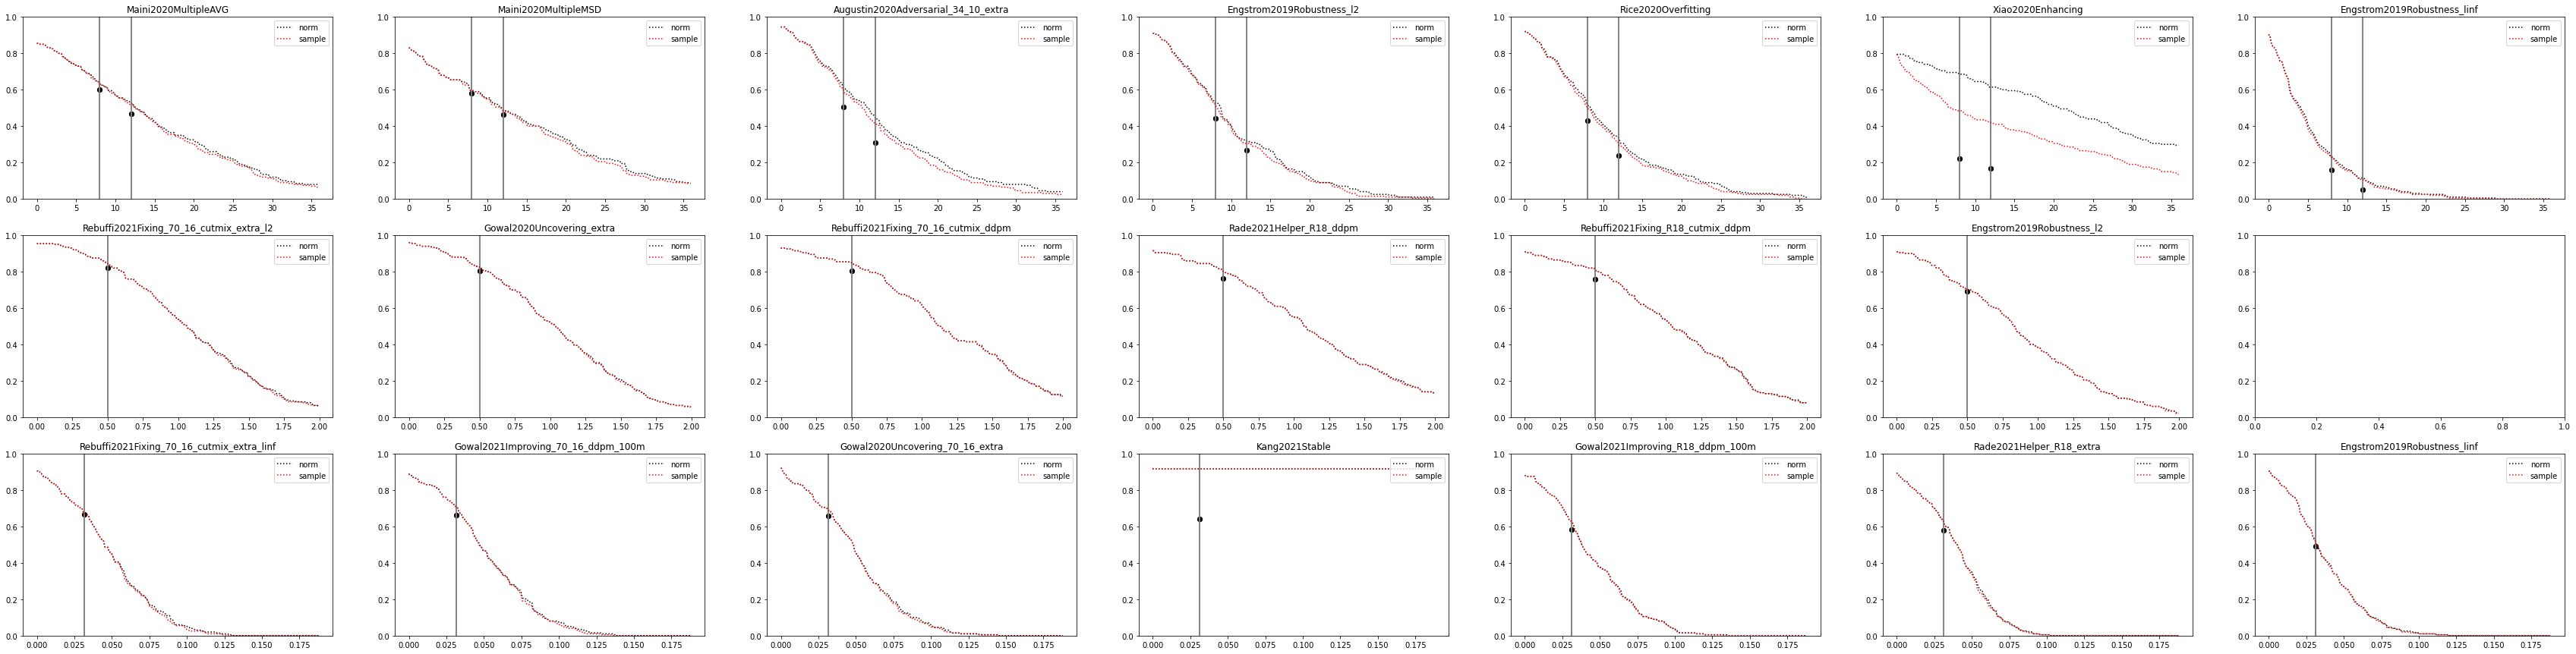

In [76]:
logger.plot_SE_grid(figsize=(60,15), where_settings={"attack":"fmn_all"}, compare_on="level")

In [77]:
# Ensemble FMN2 for L1

OPTIMAL_HYPERS=OPTIMAL_HYPERS_BEST
for norm in OPTIMAL_HYPERS:
    for model in SCORES[norm][0]:
        if "Xiao" in model or "Kang" in model:
            continue
        for attack in ["fmn2"]:
            run_ids = [*list(logger.where(model=model, norm=norm, attack=attack, γ_final="x", fmn_init=True, balanced_init=False, targeted_line=False).keys())]
            is_slow = lambda x: logger.get_n_steps(x) > 999
            quick_ids = [*filter(lambda x: not is_slow(x), run_ids)]
            for i in quick_ids:
                print(i)
            print()
            if quick_ids:
                logger.merge(f"dataset-CIFAR10-norm-{norm}-attack-{attack}_all-model-{model}-α_init-ensemble-steps-101", quick_ids)
                logger.merge(f"dataset-CIFAR10-norm-{norm}-attack-{attack}_all-model-{model}-steps-101", quick_ids)

                
OPTIMAL_HYPERS = OPTIMAL_HYPERS_NORM

dataset-CIFAR10-norm-L1-attack-fmn2-model-Maini2020MultipleAVG-balanced_init-False-fmn_init-True-ifmn_α_init-5-loss_f-DL-steps-100-targeted_line-False-top_explore-10-track_grad_size-True-α_final-0.0001-α_init-12
dataset-CIFAR10-norm-L1-attack-fmn2-model-Maini2020MultipleAVG-balanced_init-False-binary_search_steps-10-fmn_init-True-ifmn_α_init-1-loss_f-DL-steps-100-targeted_line-False-top_explore-10-track_grad_size-True-α_final-0.0001-α_init-5
dataset-CIFAR10-norm-L1-attack-fmn2-model-Maini2020MultipleAVG-balanced_init-False-binary_search_steps-10-fmn_init-True-ifmn_α_init-5-loss_f-DL-steps-100-targeted_line-False-top_explore-10-track_grad_size-True-α_final-0.0001-α_init-1
dataset-CIFAR10-norm-L1-attack-fmn2-model-Maini2020MultipleAVG-balanced_init-False-binary_search_steps-10-fmn_init-True-ifmn_α_init-1-loss_f-DL-steps-100-targeted_line-False-top_explore-10-track_grad_size-True-α_final-0.0001-α_init-1
dataset-CIFAR10-norm-L1-attack-fmn2-model-Maini2020MultipleAVG-balanced_init-False-bin

# Detailed exploration of differences between multitargeted and init in L1

## Compare fixed 11*100 with fixed 300 fixed and fixed and fmn2 sample with all inits

In [78]:
s = {**{"norm":"L1", "balanced_init": "False", "top_explore": 10, "fmn_init":True, "targeted_line":False, "γ_final":"x", "binary_search_steps":"x"},
**{"level": "norm", "target":"x"},
**{"α_init": "1", "ifmn_α_init":"5"}}
[*logger.where(**s).keys()]

['dataset-CIFAR10-norm-L1-attack-fmn2-model-Xiao2020Enhancing-balanced_init-False-fmn_init-True-ifmn_α_init-5-loss_f-DL-steps-100-targeted_line-False-top_explore-10-track_grad_size-True-α_final-0.0001-α_init-1',
 'dataset-CIFAR10-norm-L1-attack-fmn2-model-Engstrom2019Robustness_linf-balanced_init-False-fmn_init-True-ifmn_α_init-5-loss_f-DL-steps-100-targeted_line-False-top_explore-10-track_grad_size-True-α_final-0.0001-α_init-1',
 'dataset-CIFAR10-norm-L1-attack-fmn2-model-Rice2020Overfitting-balanced_init-False-fmn_init-True-ifmn_α_init-5-loss_f-DL-steps-100-targeted_line-False-top_explore-10-track_grad_size-True-α_final-0.0001-α_init-1',
 'dataset-CIFAR10-norm-L1-attack-fmn2-model-Augustin2020Adversarial_34_10_extra-balanced_init-False-fmn_init-True-ifmn_α_init-5-loss_f-DL-steps-100-targeted_line-False-top_explore-10-track_grad_size-True-α_final-0.0001-α_init-1',
 'dataset-CIFAR10-norm-L1-attack-fmn2-model-Maini2020MultipleMSD-balanced_init-False-fmn_init-True-ifmn_α_init-5-loss_f-DL

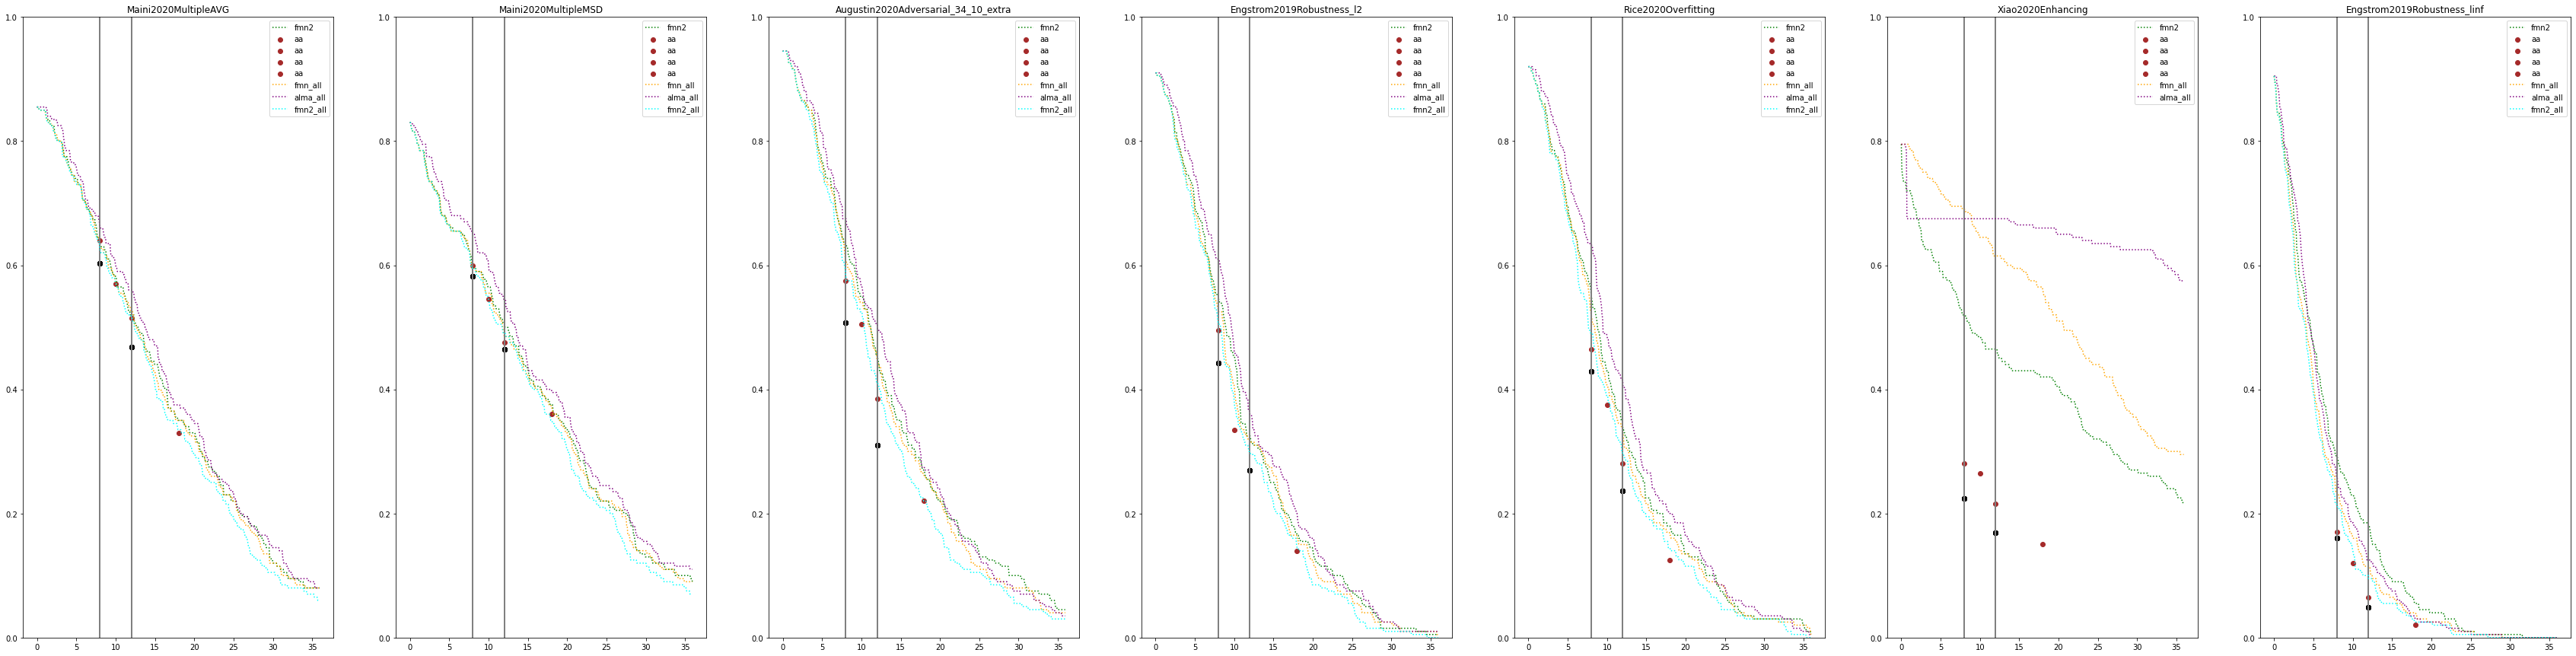

In [79]:
logger.plot_SE_grid(figsize=(60,15), where_settings=s, compare_on="attack")

## Add FMN2 ensemble line with fixed alpha init
-- to see if tuning alpha init is enough or not

In [80]:
# Ensemble FMN2

OPTIMAL_HYPERS=OPTIMAL_HYPERS_BEST
for norm in OPTIMAL_HYPERS:
    for model in SCORES[norm][0]:
        if "Xiao" in model or "Kang" in model:
            continue
        for attack in ["fmn2"]:
            run_ids = [*list(logger.where(model=model, attack=attack, **OPTIMAL_HYPERS[norm], γ_final="x", fmn_init=True, balanced_init=False, targeted_line=False).keys())]
            is_slow = lambda x: logger.get_n_steps(x) > 999
            quick_ids = [*filter(lambda x: not is_slow(x), run_ids)]
            for i in quick_ids:
                print(i)
            print()
            if quick_ids:
                logger.merge(f"dataset-CIFAR10-norm-{norm}-attack-{attack}_allf-model-{model}-α_init-ensemble-steps-101", quick_ids)
                logger.merge(f"dataset-CIFAR10-norm-{norm}-attack-{attack}_allf-model-{model}-steps-101", quick_ids)

                
OPTIMAL_HYPERS = OPTIMAL_HYPERS_NORM

dataset-CIFAR10-norm-L1-attack-fmn2-model-Maini2020MultipleAVG-balanced_init-False-binary_search_steps-10-fmn_init-True-ifmn_α_init-1-loss_f-DL-steps-100-targeted_line-False-top_explore-10-track_grad_size-True-α_final-0.0001-α_init-5
dataset-CIFAR10-norm-L1-attack-fmn2-model-Maini2020MultipleAVG-balanced_init-False-binary_search_steps-10-fmn_init-True-ifmn_α_init-1-loss_f-DL-steps-100-targeted_line-False-top_explore-10-track_grad_size-True-α_final-0.0001-α_init-1
dataset-CIFAR10-norm-L1-attack-fmn2-model-Maini2020MultipleAVG-balanced_init-False-binary_search_steps-10-fmn_init-True-ifmn_α_init-1-loss_f-DL-steps-100-targeted_line-False-top_explore-10-track_grad_size-True-α_final-0.0001-α_init-10

dataset-CIFAR10-norm-L1-attack-fmn2-model-Maini2020MultipleMSD-balanced_init-False-binary_search_steps-10-fmn_init-True-ifmn_α_init-1-loss_f-DL-steps-100-targeted_line-False-top_explore-10-track_grad_size-True-α_final-0.0001-α_init-1
dataset-CIFAR10-norm-L1-attack-fmn2-model-Maini2020MultipleMSD

In [81]:
s = {**{"norm":"L1", "balanced_init": "False", "top_explore": 10, "fmn_init":True, "targeted_line":False, "γ_final":"x", "binary_search_steps":"x"},
**{"level": "sample", "target":"x"},
**{"α_init": "1", "ifmn_α_init":"5"}}
[*logger.where(**s).keys()]

['dataset-CIFAR10-norm-L1-attack-fmn2-model-Xiao2020Enhancing-balanced_init-False-fmn_init-True-ifmn_α_init-5-loss_f-DL-steps-100-targeted_line-False-top_explore-10-track_grad_size-True-α_final-0.0001-α_init-1',
 'dataset-CIFAR10-norm-L1-attack-fmn2-model-Engstrom2019Robustness_linf-balanced_init-False-fmn_init-True-ifmn_α_init-5-loss_f-DL-steps-100-targeted_line-False-top_explore-10-track_grad_size-True-α_final-0.0001-α_init-1',
 'dataset-CIFAR10-norm-L1-attack-fmn2-model-Rice2020Overfitting-balanced_init-False-fmn_init-True-ifmn_α_init-5-loss_f-DL-steps-100-targeted_line-False-top_explore-10-track_grad_size-True-α_final-0.0001-α_init-1',
 'dataset-CIFAR10-norm-L1-attack-fmn2-model-Augustin2020Adversarial_34_10_extra-balanced_init-False-fmn_init-True-ifmn_α_init-5-loss_f-DL-steps-100-targeted_line-False-top_explore-10-track_grad_size-True-α_final-0.0001-α_init-1',
 'dataset-CIFAR10-norm-L1-attack-fmn2-model-Maini2020MultipleMSD-balanced_init-False-fmn_init-True-ifmn_α_init-5-loss_f-DL

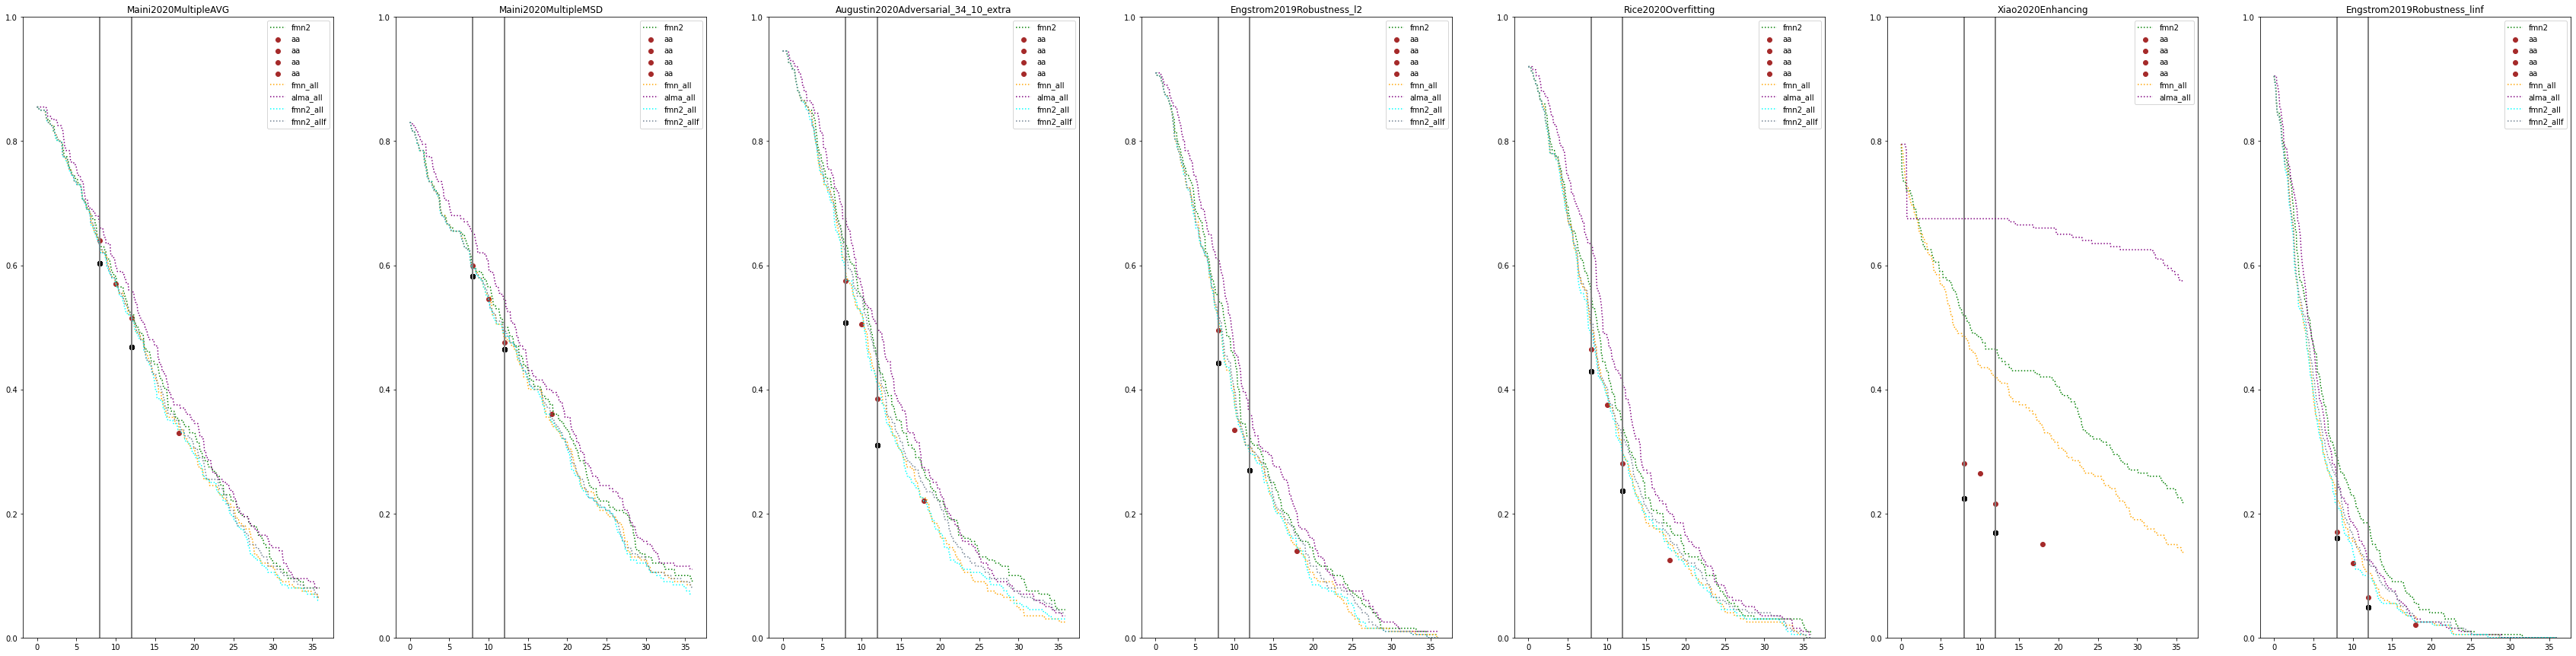

In [82]:
logger.plot_SE_grid(figsize=(60,15), where_settings=s, compare_on="attack")

## Compare FMN2 ensemble when init_aplha = aplha and when not

In [83]:
# Ensemble FMN2

OPTIMAL_HYPERS=OPTIMAL_HYPERS_BEST
for norm in OPTIMAL_HYPERS:
    for model in SCORES[norm][0]:
        if "Xiao" in model or "Kang" in model:
            continue
        for attack in ["fmn2"]:
            run_ids = [*list(logger.where(model=model, attack=attack, norm=norm, γ_final="x", fmn_init=True, balanced_init=False, targeted_line=False).keys())]
            is_slow = lambda x: logger.get_n_steps(x) > 999
            is_same = lambda x: logger.value_from_id("α_init", x) == logger.value_from_id("ifmn_α_init", x)
            quick_ids = [*filter(lambda x: (not is_slow(x)) and is_same(x) , run_ids)]
            for i in quick_ids:
                print(i)
            print()
            if quick_ids:
                logger.merge(f"dataset-CIFAR10-norm-{norm}-attack-{attack}_allp-model-{model}-α_init-ensemble-steps-101", quick_ids)
                logger.merge(f"dataset-CIFAR10-norm-{norm}-attack-{attack}_allp-model-{model}-steps-101", quick_ids)

                
OPTIMAL_HYPERS = OPTIMAL_HYPERS_NORM

dataset-CIFAR10-norm-L1-attack-fmn2-model-Maini2020MultipleAVG-balanced_init-False-binary_search_steps-10-fmn_init-True-ifmn_α_init-1-loss_f-DL-steps-100-targeted_line-False-top_explore-10-track_grad_size-True-α_final-0.0001-α_init-1
dataset-CIFAR10-norm-L1-attack-fmn2-model-Maini2020MultipleAVG-balanced_init-False-binary_search_steps-10-fmn_init-True-ifmn_α_init-5-loss_f-DL-steps-100-targeted_line-False-top_explore-10-track_grad_size-True-α_final-0.0001-α_init-5
dataset-CIFAR10-norm-L1-attack-fmn2-model-Maini2020MultipleAVG-balanced_init-False-binary_search_steps-10-fmn_init-True-ifmn_α_init-10-loss_f-DL-steps-100-targeted_line-False-top_explore-10-track_grad_size-True-α_final-0.0001-α_init-10
dataset-CIFAR10-norm-L1-attack-fmn2-model-Maini2020MultipleAVG-balanced_init-False-fmn_init-True-ifmn_α_init-5-loss_f-DL-steps-100-targeted_line-False-top_explore-10-track_grad_size-True-α_final-0.0001-α_init-5

dataset-CIFAR10-norm-L1-attack-fmn2-model-Maini2020MultipleMSD-balanced_init-False-b

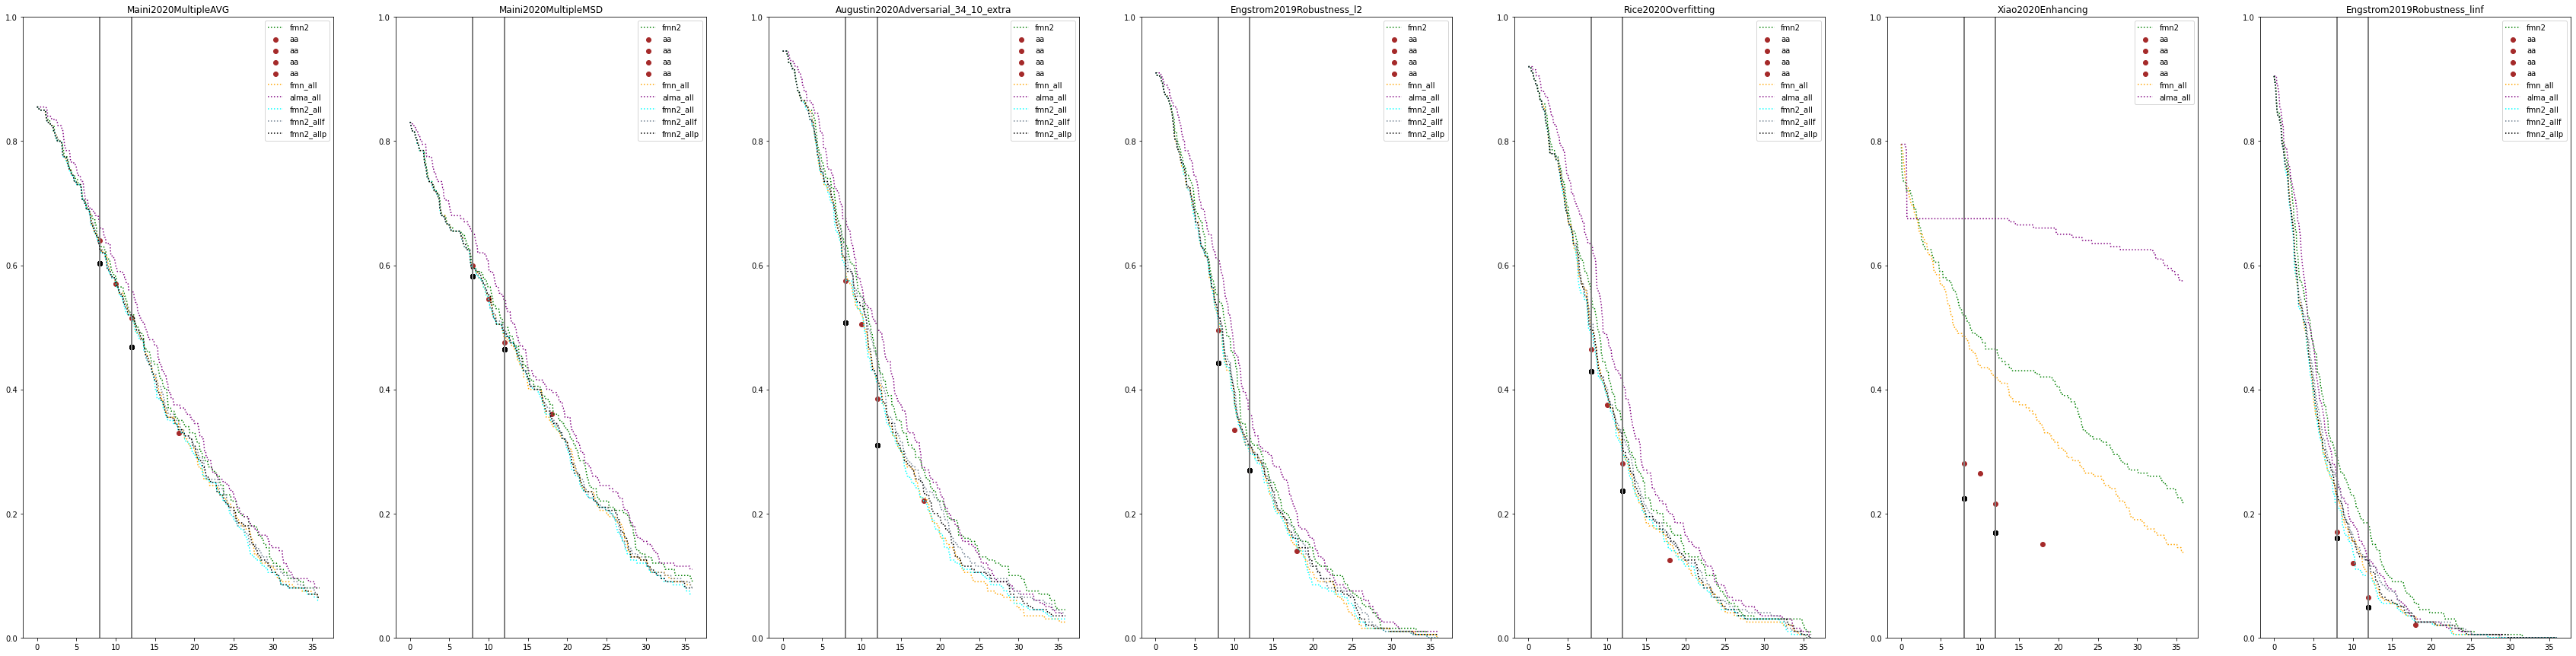

In [84]:
logger.plot_SE_grid(figsize=(60,15), where_settings=s, compare_on="attack")

In [ ]:
logger.plot_SE_grid(where_settings={"top_explore": "10", "attack": "fmn2", "fmn_init": "True", "targeted_line":"False"}, figsize=(60,15), compare_on="α_init")

In [ ]:
logger.plot_SE_grid(where_settings={"top_explore": "10", "attack": "fmn_all"}, figsize=(60,15), compare_on="level")

In [ ]:
logger.plot_SE_grid(figsize=(60,15), where_settings={"target":"x", "top_explore": "10", "targeted_line": "False", "balanced_init": "False"})

In [ ]:
logger.plot_SE_grid(figsize=(60,15), where_settings={"norm": "Linf", "target":"x", "top_explore": "10", "fmn_init": "True", "targeted_line": "False", "balanced_init": "False", "α_init":OPTIMAL_HYPERS_NORM["Linf"]["α_init"]})

In [ ]:
logger.plot_SE_grid(figsize=(60,15), where_settings={"norm": "L1", "α_init":OPTIMAL_HYPERS_NORM["L1"]["α_init"], "target":"x", "top_explore": "10", "fmn_init": "True", "targeted_line":"False"})

In [ ]:
logger.plot_SE_grid(figsize=(60,15), where_settings={"norm": "L2", "α_init":OPTIMAL_HYPERS_NORM["L2"]["α_init"], "target":"x", "top_explore": "10", "fmn_init": "True", "targeted_line":"False"})

In [ ]:
logger.plot_SE_grid(figsize=(60,15), where_settings={"norm": "Linf", "α_init":OPTIMAL_HYPERS_NORM["Linf"]["α_init"], "target":"x", "top_explore": "10", "fmn_init": "True", "targeted_line":"False"})

In [ ]:
logger.plot_SE_grid(figsize=(60,15), where_settings=s, compare_on="attack")

## Compare sample 11*100 with sample 300 fixed init to 5

In [44]:
s = {**{"norm":"L1", "balanced_init": "False", "top_explore": 10, "fmn_init":True, "targeted_line":False},
**{"level": "sample", "target":"x"}, 
**{"ifmn_α_init":"5"}}
[*logger.where(**s).keys()]

['dataset-CIFAR10-norm-L1-attack-fmn2-model-Rice2020Overfitting-balanced_init-False-binary_search_steps-10-fmn_init-True-ifmn_α_init-5-loss_f-DL-steps-100-targeted_line-False-top_explore-10-track_grad_size-True-α_final-0.0001-α_init-1',
 'dataset-CIFAR10-norm-L1-attack-fmn2-model-Engstrom2019Robustness_linf-balanced_init-False-fmn_init-True-ifmn_α_init-5-loss_f-DL-steps-100-targeted_line-False-top_explore-10-track_grad_size-True-α_final-0.0001-α_init-12',
 'dataset-CIFAR10-norm-L1-attack-fmn2-model-Xiao2020Enhancing-balanced_init-False-fmn_init-True-ifmn_α_init-5-loss_f-DL-steps-100-targeted_line-False-top_explore-10-track_grad_size-True-α_final-0.0001-α_init-1',
 'dataset-CIFAR10-norm-L1-attack-fmn2-model-Maini2020MultipleMSD-balanced_init-False-binary_search_steps-10-fmn_init-True-ifmn_α_init-5-loss_f-DL-steps-100-targeted_line-False-top_explore-10-track_grad_size-True-α_final-0.0001-α_init-5',
 'dataset-CIFAR10-norm-L1-attack-fmn2-model-Maini2020MultipleAVG-balanced_init-False-fmn_i

In [ ]:
logger.plot_SE_grid(figsize=(60,15), where_settings=s, compare_on="attack")

## Compare ifmn_alpha_init 

In [ ]:
logger.plot_SE_grid(figsize=(60,15), where_settings={"norm": "L1", "attack": "fmn2", "α_init":OPTIMAL_HYPERS_NORM["L1"]["α_init"], "target":"x", "balanced_init": "False", "top_explore": "10", "fmn_init": "True", "targeted_line":"False"}, compare_on="ifmn_α_init")

In [ ]:
for key in [*logger.where(**{"model": "Maini2020MultipleMSD","norm": "L1", "ifmn_α_init":"5", "target":"x", "balanced_init": "False", "top_explore": "10", "fmn_init": "True", "targeted_line":"False"}).keys()]:
    print(logger.value_from_id("α_init", key) , key)

In [ ]:
k = "dataset-CIFAR10-norm-L1-attack-fmn2-model-Xiao2020Enhancing-balanced_init-False-binary_search_steps-10-fmn_init-True-ifmn_α_init-5-loss_f-DL-steps-100-targeted_line-False-top_explore-10-α_final-0.0001-α_init-10-γ_init-0.05"

In [ ]:

v = lambda parameter_name, k: k.split(f"-{parameter_name}-")[1].split("-")[0]
v("α_init", k)

In [ ]:
logger.plot_SE_grid(figsize=(60,15), where_settings={"norm": "L1", "attack":"fmn2","α_init":"1", "target":"x", "balanced_init": "False", "top_explore": "10", "fmn_init": "True", "targeted_line":"False"}, compare_on="ifmn_α_init")

In [ ]:
logger.plot_SE_grid(figsize=(60,15), where_settings={"norm": "L1", "attack":"fmn2","α_init":"5", "balanced_init": "False","target":"x", "top_explore": "10", "fmn_init": "True", "targeted_line":"False"}, compare_on="ifmn_α_init")

In [ ]:
logger.plot_SE_grid(figsize=(60,15), where_settings={"norm": "L1", "attack":"fmn2","α_init":"10", "target":"x", "balanced_init": "False", "top_explore": "10", "fmn_init": "True", "targeted_line":"False"}, compare_on="ifmn_α_init")

# COmpare aplha_init given fixed ifmn_alpha_init

In [ ]:
logger.plot_SE_grid(figsize=(60,15), where_settings={"norm": "L1","ifmn_α_init":"10", "target":"x", "balanced_init": "False", "top_explore": "10", "fmn_init": "True", "targeted_line":"False"}, compare_on="α_init")

In [85]:
logger.logs_dir="logs_alma"
logger.load_all()

In [86]:
# FMN 100 untargeted + 100 targeted to each class
# ALMA 100 untargeted + 100 targeted to each class
OPTIMAL_HYPERS=OPTIMAL_HYPERS_NORM
for norm in OPTIMAL_HYPERS:
    for model in SCORES[norm][0]:
        if "Xiao" in model or "Kang" in model:
            continue
        for attack in ["fmn", "alma"]:
            run_ids = [*list(logger.where(model=model, attack=attack, **OPTIMAL_HYPERS[norm]).keys())] + [*list(logger.where(model=model, attack=attack+"_all", level="norm", **OPTIMAL_HYPERS[norm]).keys())]
            is_slow = lambda x: logger.get_n_steps(x) > 999
            quick_ids = [*filter(lambda x: not is_slow(x), run_ids)]
            if quick_ids:
                logger.merge(f"dataset-CIFAR10-norm-{norm}-attack-{attack}_all-model-{model}-level-norm-steps-101", quick_ids)

OPTIMAL_HYPERS=OPTIMAL_HYPERS_BEST
for norm in OPTIMAL_HYPERS:
    for model in SCORES[norm][0]:
        if "Xiao" in model or "Kang" in model:
            continue
        for attack in ["fmn", "alma"]:
            run_ids = [*list(logger.where(model=model, attack=attack, **OPTIMAL_HYPERS[norm]).keys())] + [*list(logger.where(model=model, attack=attack+"_all", level="sample", **OPTIMAL_HYPERS[norm]).keys())]
            is_slow = lambda x: logger.get_n_steps(x) > 999
            quick_ids = [*filter(lambda x: not is_slow(x), run_ids)]
            if quick_ids:
                logger.merge(f"dataset-CIFAR10-norm-{norm}-attack-{attack}_all-model-{model}-level-sample-steps-101", quick_ids)
                
OPTIMAL_HYPERS = OPTIMAL_HYPERS_NORM

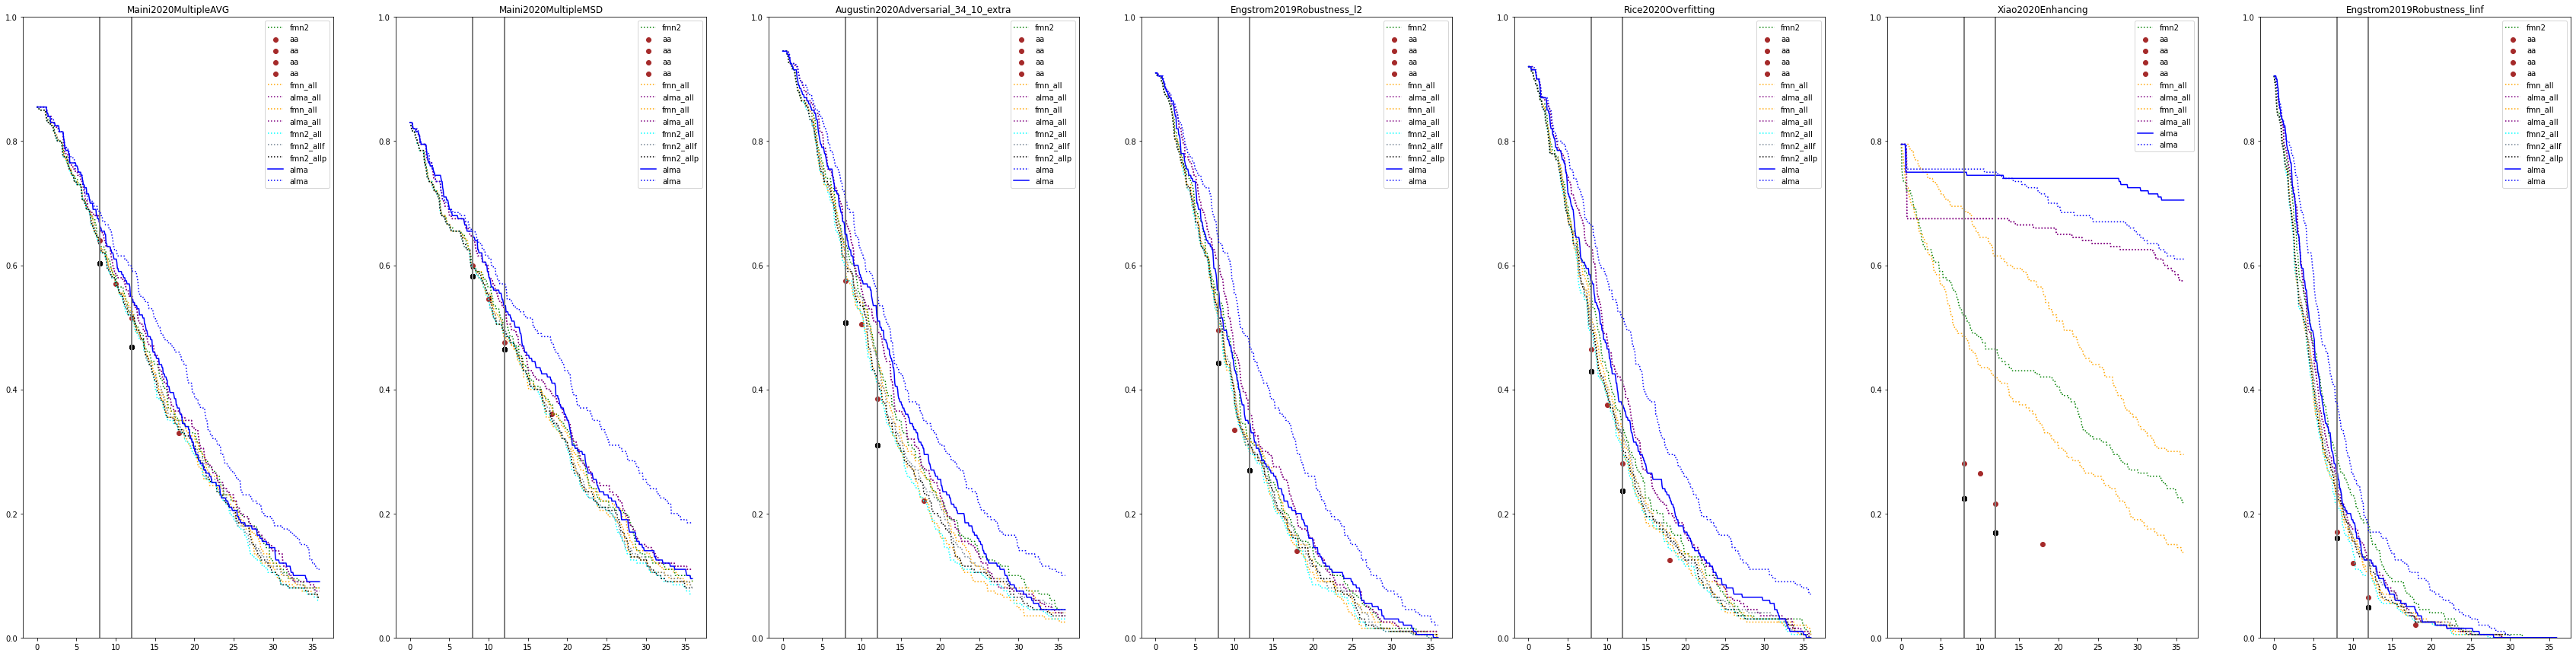

In [96]:
logger.plot_SE_grid(figsize=(60,15), where_settings={"norm": "L1", "α_init":OPTIMAL_HYPERS_NORM["L1"]["α_init"], "target":"x", "top_explore": "10", "fmn_init": "True", "targeted_line":"False", "binary_search_steps":"x"})

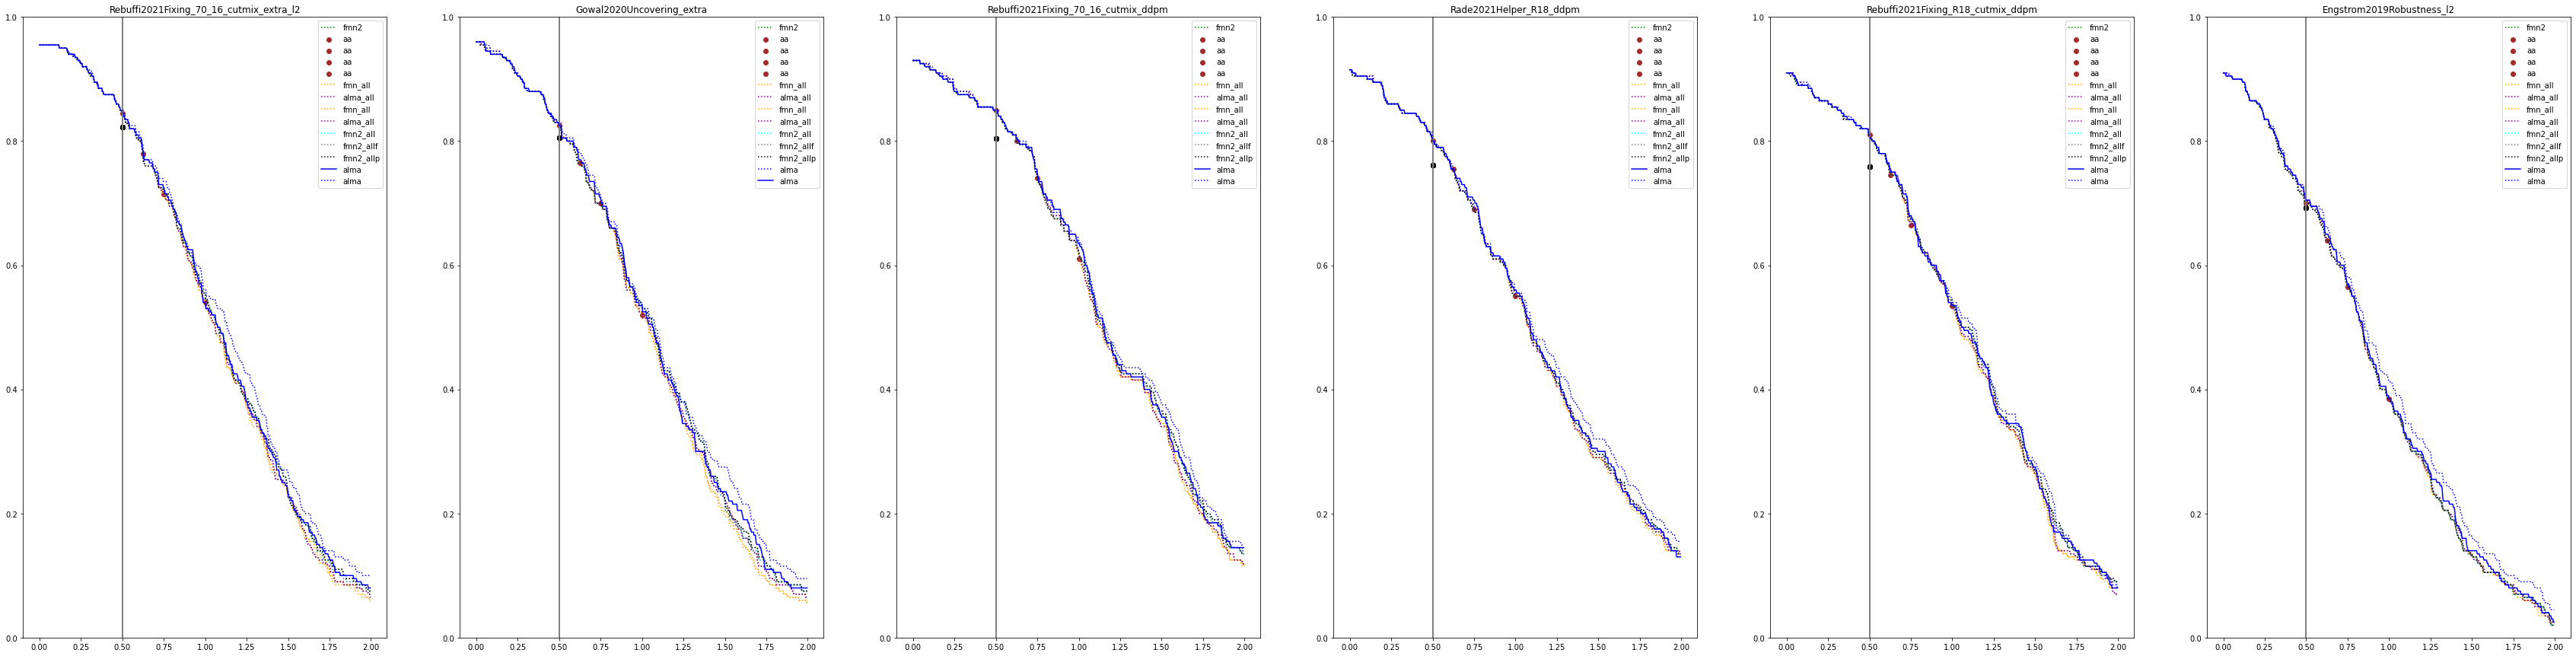

In [97]:
logger.plot_SE_grid(figsize=(60,15), where_settings={"norm": "L2", "α_init":OPTIMAL_HYPERS_NORM["L2"]["α_init"], "target":"x", "top_explore": "10", "fmn_init": "True", "targeted_line":"False", "binary_search_steps":"x"})

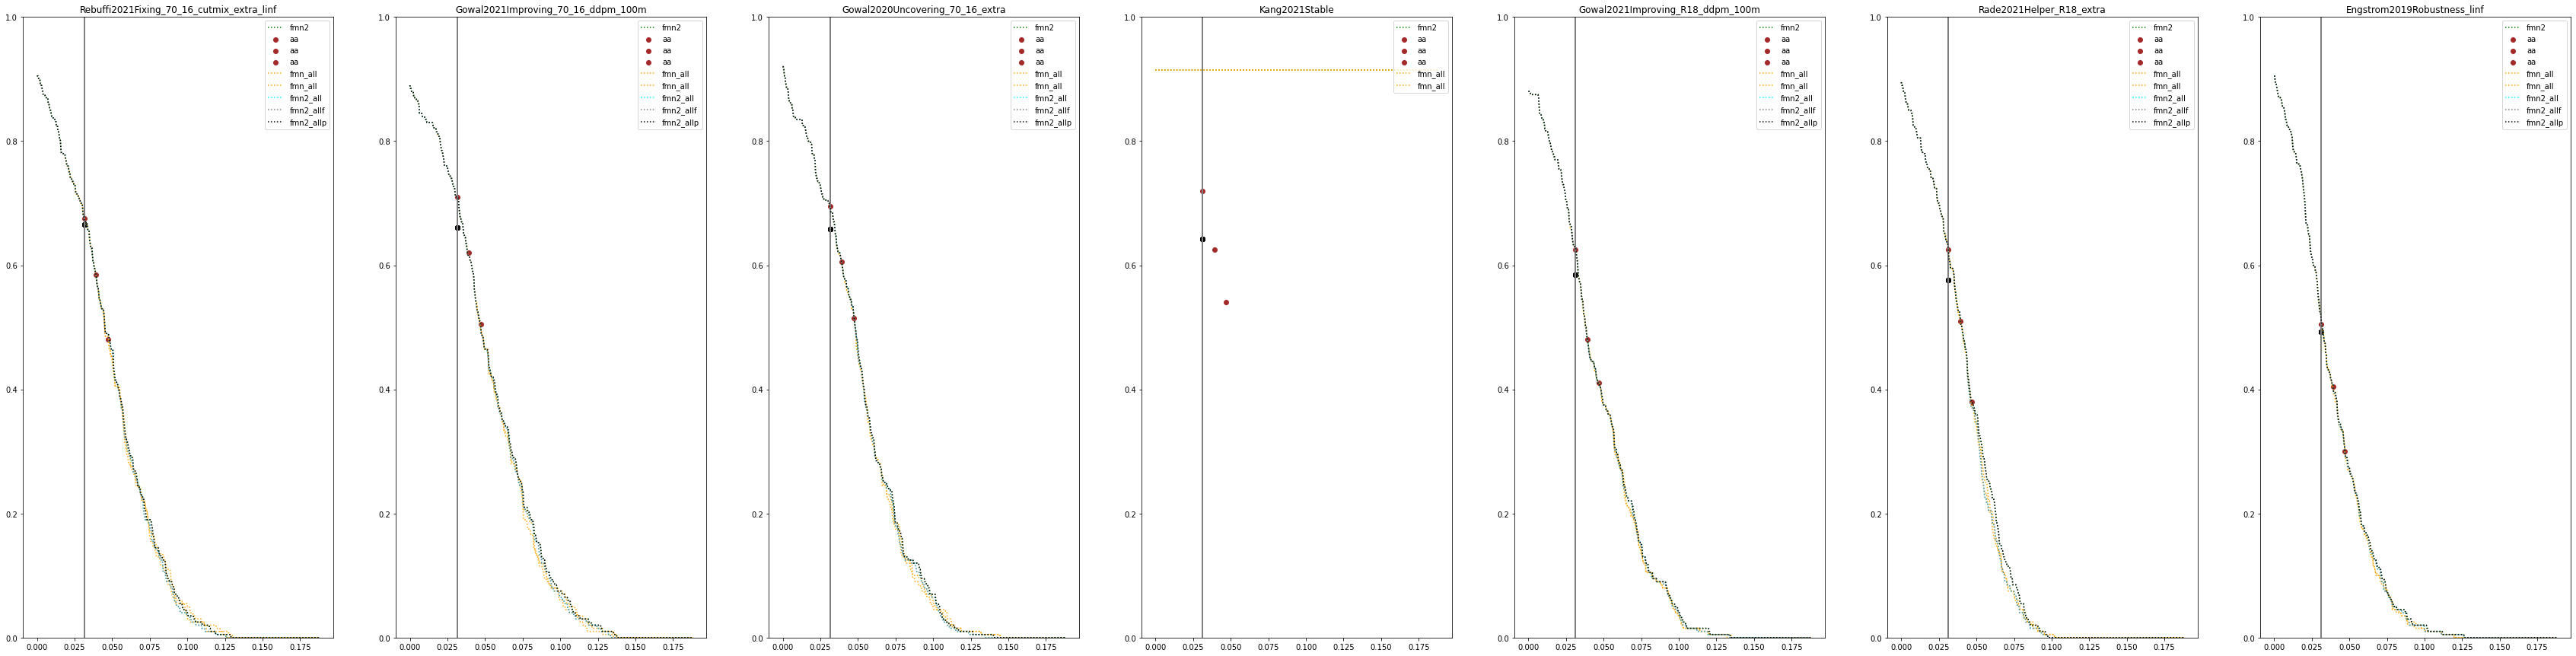

In [98]:
logger.plot_SE_grid(figsize=(60,15), where_settings={"norm": "Linf", "α_init":OPTIMAL_HYPERS_NORM["Linf"]["α_init"], "target":"x", "top_explore": "10", "fmn_init": "True", "targeted_line":"False", "binary_search_steps":"x"})

In [100]:
report = logger.report_ra(logger.where(norm="Linf", top_explore="10", α_init=OPTIMAL_HYPERS_NORM["Linf"]["α_init"]), eps=8/255+0.00001)
report.groupby(["model", "attack"])["rob_acc"].min()

model                                      attack   
Engstrom2019Robustness_linf                aa           0.505
                                           fmn          0.550
                                           fmn2         0.510
                                           fmn2_all     0.510
                                           fmn2_allf    0.510
                                           fmn2_allp    0.510
                                           fmn_all      0.510
                                           fmn_t        0.740
Gowal2020Uncovering_70_16_extra            aa           0.695
                                           fmn          0.695
                                           fmn2         0.695
                                           fmn2_all     0.695
                                           fmn2_allf    0.695
                                           fmn2_allp    0.695
                                           fmn_all      0.695
                 

In [91]:
print("Improvement in rob_acc over plain AA:")
report[report.attack == "aa"].groupby(["model"])["rob_acc"].min() - report[report.attack != "aa"].groupby(["model"])["rob_acc"].min()

Improvement in rob_acc over plain AA:


model
Engstrom2019Robustness_linf                 -0.005
Gowal2020Uncovering_70_16_extra              0.000
Gowal2021Improving_70_16_ddpm_100m           0.000
Gowal2021Improving_R18_ddpm_100m             0.000
Kang2021Stable                              -0.195
Rade2021Helper_R18_extra                     0.000
Rebuffi2021Fixing_70_16_cutmix_extra_linf    0.000
Name: rob_acc, dtype: float64

In [105]:
report = logger.report_ra(logger.where(norm="L2", top_explore="10", α_init=OPTIMAL_HYPERS_NORM["L2"]["α_init"]), eps=0.5+ 0.00001)
report[(report.attack != "fmn_t") & (report.attack != "alma_t")].groupby(["model", "attack"])["rob_acc"].min()

model                                    attack   
Engstrom2019Robustness_l2                aa           0.700
                                         alma         0.705
                                         alma_all     0.705
                                         fmn          0.715
                                         fmn2         0.700
                                         fmn2_all     0.700
                                         fmn2_allf    0.700
                                         fmn2_allp    0.700
                                         fmn_all      0.700
Gowal2020Uncovering_extra                aa           0.825
                                         alma         0.825
                                         alma_all     0.825
                                         fmn          0.835
                                         fmn2         0.825
                                         fmn2_all     0.825
                                         fmn2_all

In [93]:
print("Improvement in rob_acc over plain AA:")
report[report.attack == "aa"].groupby(["model"])["rob_acc"].min() - report[report.attack != "aa"].groupby(["model"])["rob_acc"].min()

Improvement in rob_acc over plain AA:


model
Engstrom2019Robustness_l2                  0.0
Gowal2020Uncovering_extra                  0.0
Rade2021Helper_R18_ddpm                    0.0
Rebuffi2021Fixing_70_16_cutmix_ddpm        0.0
Rebuffi2021Fixing_70_16_cutmix_extra_l2    0.0
Rebuffi2021Fixing_R18_cutmix_ddpm          0.0
Name: rob_acc, dtype: float64

In [106]:
report = logger.report_ra(logger.where(norm="L1", α_init=OPTIMAL_HYPERS_NORM["L1"]["α_init"]), eps=8+ 0.00001)
report[(report.attack != "fmn_t") & (report.attack != "alma_t")][report.attack != "alma_t"].groupby(["model", "attack"])["rob_acc"].min()

/var/tmp/pbs.11822799.meta-pbs.metacentrum.cz/ipykernel_4117931/4218265514.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  report[(report.attack != "fmn_t") & (report.attack != "alma_t")][report.attack != "alma_t"].groupby(["model", "attack"])["rob_acc"].min()


model                                attack   
Augustin2020Adversarial_34_10_extra  aa           0.575
                                     alma         0.650
                                     alma_all     0.675
                                     fmn          0.640
                                     fmn2         0.625
                                     fmn2_all     0.585
                                     fmn2_allf    0.625
                                     fmn2_allp    0.605
                                     fmn_all      0.590
Engstrom2019Robustness_l2            aa           0.495
                                     alma         0.560
                                     alma_all     0.605
                                     fmn          0.555
                                     fmn2         0.535
                                     fmn2_all     0.505
                                     fmn2_allf    0.520
                                     fmn2_allp    0.515
 

In [95]:
print("Improvement in rob_acc over plain AA:")
report[report.attack == "aa"].groupby(["model"])["rob_acc"].min() - report[report.attack != "aa"].groupby(["model"])["rob_acc"].min()

Improvement in rob_acc over plain AA:


model
Augustin2020Adversarial_34_10_extra   -0.010
Engstrom2019Robustness_l2             -0.010
Engstrom2019Robustness_linf           -0.045
Maini2020MultipleAVG                   0.015
Maini2020MultipleMSD                   0.005
Rice2020Overfitting                   -0.025
Xiao2020Enhancing                     -0.205
Name: rob_acc, dtype: float64